In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('reallifedata.csv')

In [3]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [4]:
# EDA and preprocessing

In [5]:
data.Body.unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [6]:
data.Brand.unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [7]:
data.Model.unique()

array(['320', 'Sprinter 212', 'S 500', 'Q7', 'Rav 4', 'GLS 63', 'A6',
       'Megane', 'Golf IV', '19', 'A6 Allroad', 'Passat B6',
       'Land Cruiser 100', 'Clio', '318', 'Vito', 'Hilux', 'Polo',
       'Outlander', 'A8', 'Touareg', 'Colt', 'GLS 500', '100', 'Z4',
       'Pajero Wagon', 'X5', 'Caddy', 'Camry', '528', 'TT', 'A4',
       'G 55 AMG', 'X6', 'Galant', '525', 'E-Class', 'Kangoo', 'ML 350',
       'GLS 350', '730', 'Trafic', 'X5 M', 'S 350', 'Lancer', 'Scenic',
       '330', 'Passat B5', 'A3', 'Land Cruiser Prado', 'Caravelle',
       'Avensis', 'GL 320', 'GL 350', 'GL 450', 'Lancer X', '200', '520',
       'Tiguan', 'Outlander XL', 'A5', 'X6 M', 'Golf III', 'A 150',
       'FJ Cruiser', 'Golf GTI', 'Koleos', 'T4 (Transporter)',
       'Land Cruiser 200', 'Passat B7', 'Scirocco', 'M5', 'Venza', '80',
       'V 250', 'ML 270', 'C-Class', 'Lupo', '5 Series', 'CLA 200',
       'T5 (Transporter)', 'Highlander', 'Corolla', 'CLK 240',
       'Passat CC', 'I3', 'Multivan', 'Vaneo'

In [8]:
md1 = data.Model.unique()

In [9]:
md1.shape

(312,)

In [10]:
data.Registration.unique()

array(['yes', 'no'], dtype=object)

In [11]:
data = data.drop('Model', axis=1)

In [12]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [13]:
#Missing Values

In [14]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [15]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [16]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [17]:
data = data.dropna(axis=0)

In [18]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [19]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [20]:
# Outliers & Normality

In [21]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_14356\3617746021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


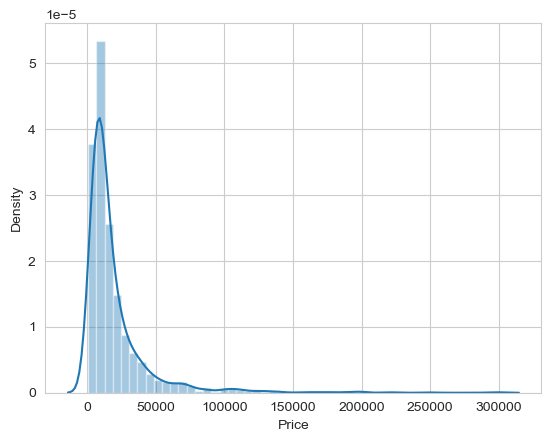

In [22]:
sns.distplot(data['Price'])
plt.show()

In [23]:
q = data['Price'].quantile(0.99)

In [24]:
q

129812.51999999981

In [25]:
data_1 = data[data['Price']<q]

In [26]:
data_1

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_14356\300526289.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


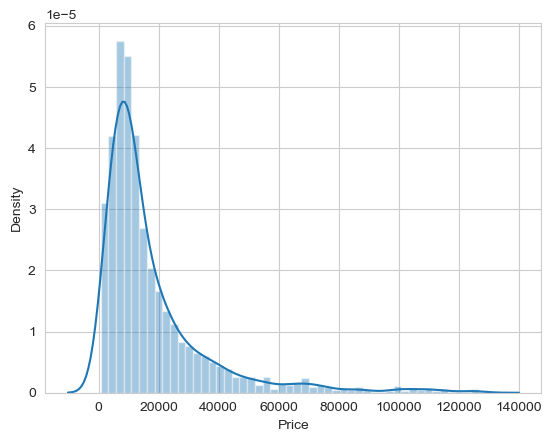

In [27]:
sns.distplot(data_1['Price'])
plt.show()

C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_14356\853927192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Mileage'])


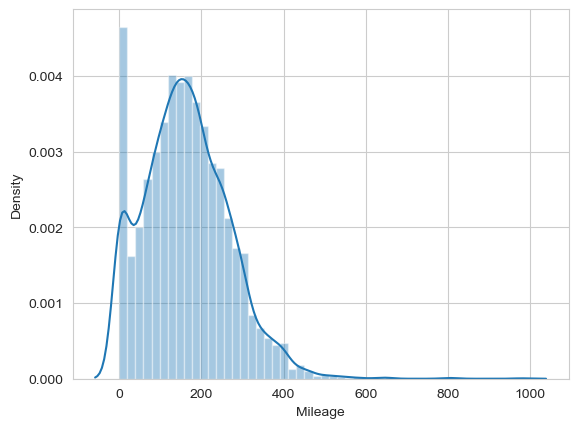

In [28]:
sns.distplot(data['Mileage'])
plt.show()

In [29]:
q = data_1['Mileage'].quantile(0.99)

In [30]:
q

435.5100000000002

In [31]:
data_2 = data_1[data_1['Mileage']<q]

In [32]:
data_2

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_14356\253818997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


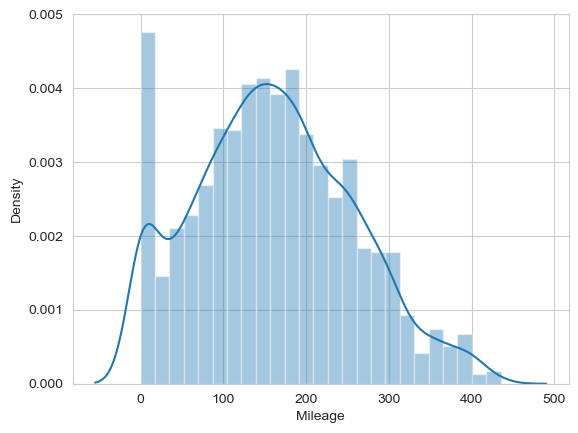

In [33]:
sns.distplot(data_2['Mileage'])
plt.show()

C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_14356\3733986072.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['EngineV'])


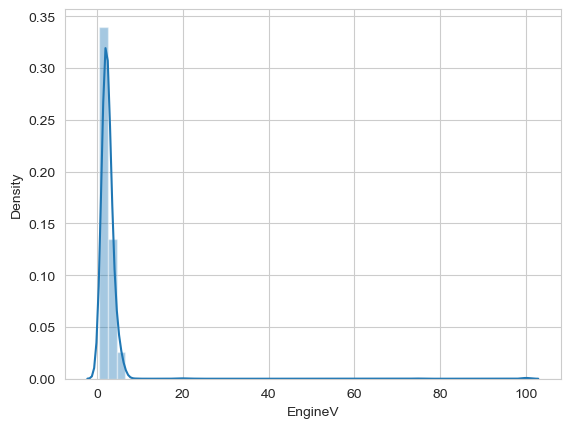

In [34]:
sns.distplot(data['EngineV'])
plt.show()

In [35]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [36]:
data_3 = data_2[data_2['EngineV']<6.5]

In [37]:
data_3

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_14356\3157585394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


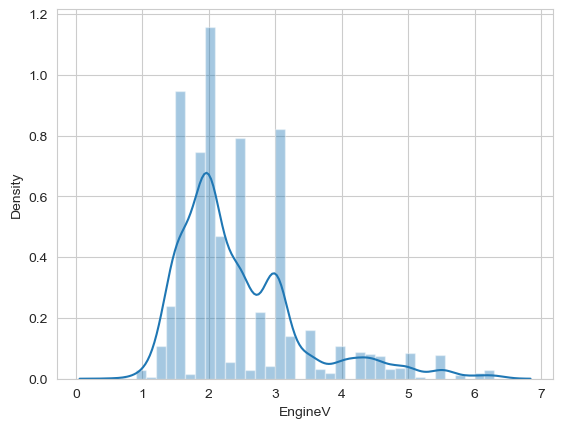

In [38]:
sns.distplot(data_3['EngineV'])
plt.show()

C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_14356\1590805366.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Year'])


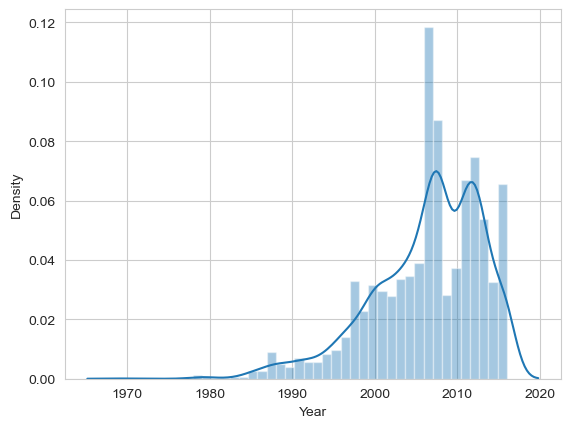

In [39]:
sns.distplot(data['Year'])
plt.show()

In [40]:
q = data_3['Year'].quantile(0.01)

In [41]:
q

1987.0

In [42]:
data_4 = data_3[data_3['Year']>q]

In [43]:
data_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_14356\3416783924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


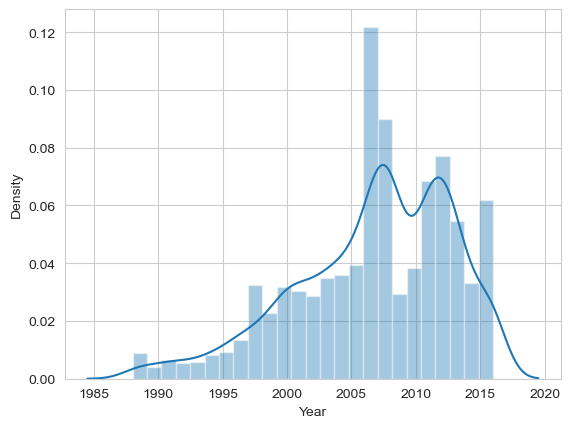

In [44]:
sns.distplot(data_4['Year'])
plt.show()

In [45]:
data_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


# Reset index to show correct rows

In [46]:
data_cleaned = data_4.reset_index(drop=True)

In [47]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [48]:
# linearity

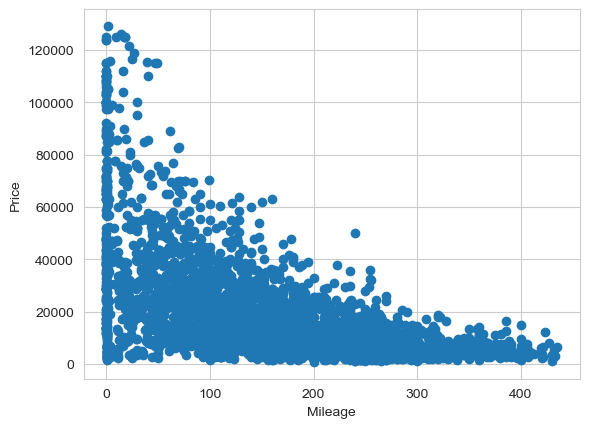

In [49]:
plt.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

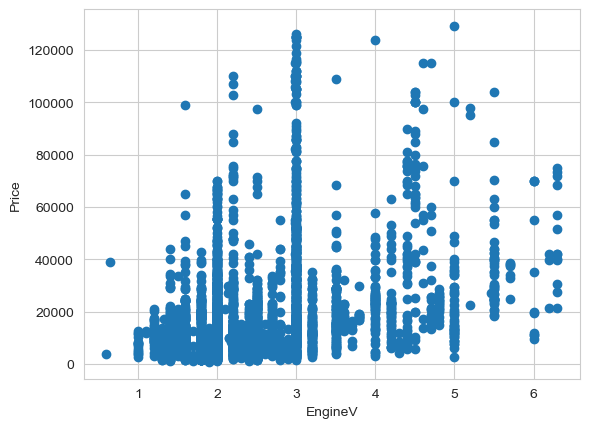

In [50]:
plt.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
plt.xlabel('EngineV')
plt.ylabel('Price')
plt.show()

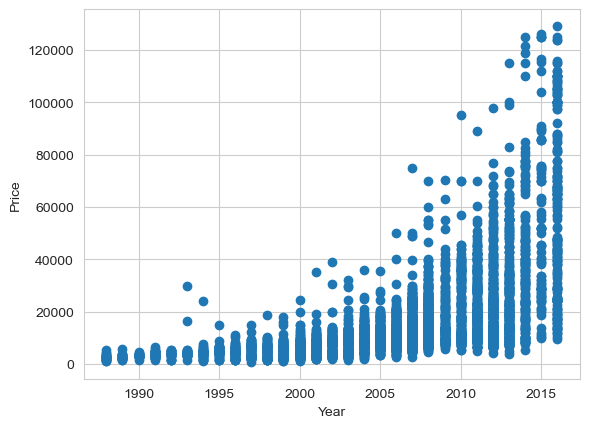

In [51]:
plt.scatter(data_cleaned['Year'],data_cleaned['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

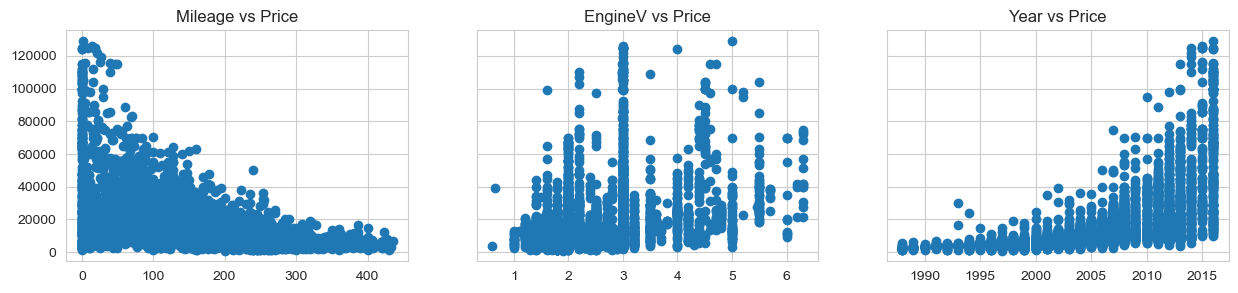

In [52]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax1.set_title('Mileage vs Price')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('EngineV vs Price')
ax3.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax3.set_title('Year vs Price')
plt.show()

C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_14356\1753854520.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


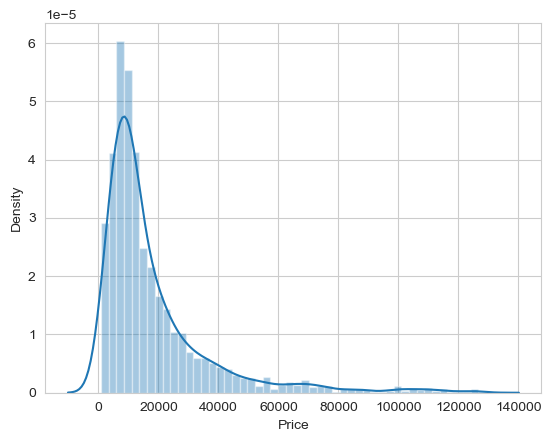

In [53]:
sns.distplot(data_cleaned['Price'])
plt.show()

In [54]:
log_Price = np.log(data_cleaned['Price'])

In [55]:
log_Price

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3862     9.350102
3863     9.792556
3864    11.736069
3865     8.779557
3866     9.510445
Name: Price, Length: 3867, dtype: float64

C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_14356\2440641014.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_Price)


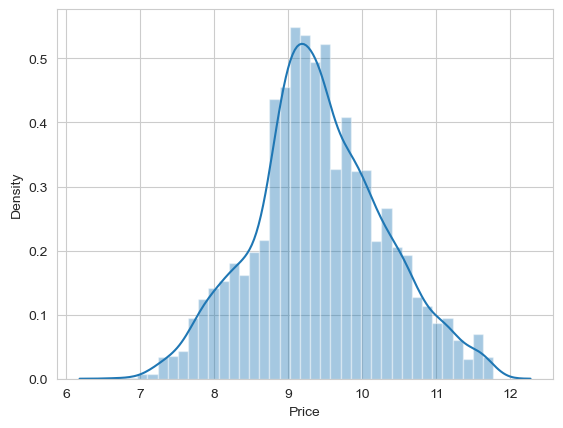

In [56]:
sns.distplot(log_Price)
plt.show()

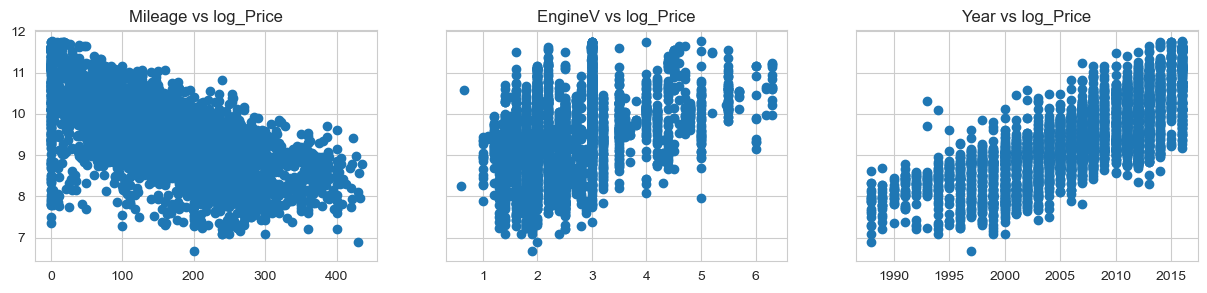

In [57]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Mileage'],log_Price)
ax1.set_title('Mileage vs log_Price')
ax2.scatter(data_cleaned['EngineV'],log_Price)
ax2.set_title('EngineV vs log_Price')
ax3.scatter(data_cleaned['Year'],log_Price)
ax3.set_title('Year vs log_Price')
plt.show()

In [58]:
data_cleaned['log_Price'] = log_Price

In [59]:
data_cleaned = data_cleaned.drop('Price',axis=1)

In [60]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [61]:
# multicolinearity

In [62]:
multi  = data_cleaned[['Mileage','EngineV','Year']]

In [63]:
multi

,Mileage,EngineV,Year
0,277,2.0,1991
1,427,2.9,1999
2,358,5.0,2003
3,240,4.2,2007
4,120,2.0,2011
...,...,...,...
3862,163,2.5,2008
3863,35,1.6,2014
3864,9,3.0,2014
3865,1,3.5,1999


In [64]:
multi.corr()

,Mileage,EngineV,Year
Mileage,1.000000,0.005710,-0.715361
EngineV,0.005710,1.000000,-0.020152
Year,-0.715361,-0.020152,1.000000


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = [variance_inflation_factor(multi.values, i) for i in range(3)]

In [67]:
vif

[3.7915836908224834, 7.662067874651508, 10.35485444268895]

In [68]:
data_with_no_coll = data_cleaned.drop('Year', axis=1)

In [69]:
data_with_no_coll

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [70]:
# categorical values

In [71]:
data_with_no_coll.Brand.unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [112]:
data_with_no_coll

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [119]:
data_with_dummies = pd.get_dummies(data_with_no_coll,drop_first=True,dtype=float)

In [120]:
data_with_dummies

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,427,2.9,8.974618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,358,5.0,9.495519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,240,4.2,10.043249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,120,2.0,9.814656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3863,35,1.6,9.792556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3864,9,3.0,11.736069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3865,1,3.5,8.779557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [121]:
inputs = data_with_dummies.drop('log_Price', axis=1)

In [122]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,427,2.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,358,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,240,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,120,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3863,35,1.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3864,9,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3865,1,3.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [123]:
targets = data_with_dummies['log_Price']

In [124]:
targets

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3862     9.350102
3863     9.792556
3864    11.736069
3865     8.779557
3866     9.510445
Name: log_Price, Length: 3867, dtype: float64

In [125]:
#Standardization

In [126]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,427,2.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,358,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,240,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,120,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3863,35,1.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3864,9,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3865,1,3.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [127]:
data_with_dummies.describe()              

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,160.542539,2.450440,9.415703,0.161365,0.195242,0.078097,0.111715,0.128782,0.219291,0.065425,0.095681,0.379364,0.096199,0.157745,0.146884,0.025601,0.360228,0.906387
std,95.633291,0.949366,0.876616,0.367915,0.396438,0.268358,0.315056,0.335002,0.413820,0.247307,0.294192,0.485291,0.294902,0.364549,0.354036,0.157963,0.480128,0.291327
min,0.000000,0.600000,6.684612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,1.800000,8.881836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,157.000000,2.200000,9.367344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,225.000000,3.000000,9.985068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,435.000000,6.300000,11.769287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
# Why this is not showing all the columns

C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_14356\379777756.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_dummies['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

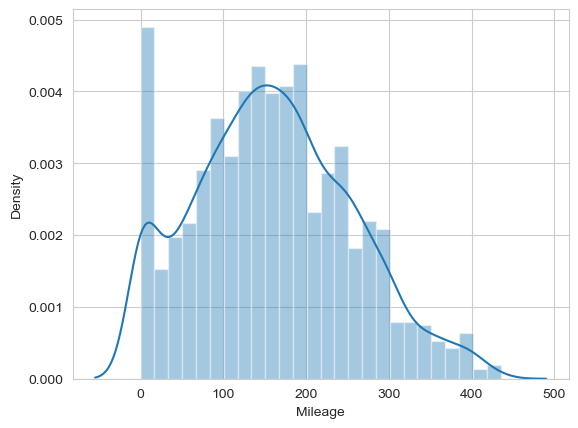

In [129]:
sns.distplot(data_with_dummies['Mileage'])

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler()

In [132]:
X = scaler.fit_transform(inputs)

In [133]:
X

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [134]:
X.shape

(3867, 17)

C:\Users\NUPUR SRIVASTAVA\AppData\Local\Temp\ipykernel_14356\4133515717.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:, 0])


<Axes: ylabel='Density'>

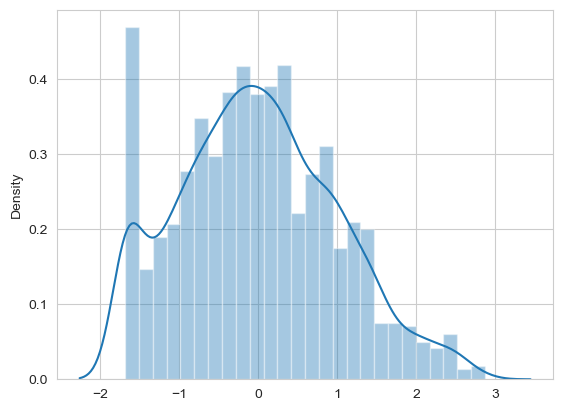

In [135]:
sns.distplot(X[:, 0])

In [136]:
X

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [137]:
X

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [138]:
targets

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3862     9.350102
3863     9.792556
3864    11.736069
3865     8.779557
3866     9.510445
Name: log_Price, Length: 3867, dtype: float64

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X,targets,test_size=0.2,random_state=0 )


In [141]:
# test_size = 0.2 denotes 20% of all data to be split as test data and remaining 80% data to be used to train the model.

In [142]:
X_train

array([[-1.67894779,  0.57894557,  2.27971827, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-0.76910509, -0.89591293, -0.43865069, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.2148331 ,  0.05221039, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [ 0.22440131,  0.26290447, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 1.00874846, -0.68521886, -0.43865069, ..., -0.16209221,
        -0.75037043, -3.11164272],
       [ 1.2179077 , -1.00125996, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [143]:
X_train.shape

(3093, 17)

In [144]:
Y_train.shape

(3093,)

In [145]:
X_test.shape

(774, 17)

In [146]:
Y_test.shape

(774,)

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
model = LinearRegression()

In [149]:
model.fit(X_train,Y_train)

LinearRegression()

In [150]:
model.score(X_train,Y_train)

0.7560757626780437

In [151]:
model.score(X_test, Y_test)

0.7298130876286572

In [152]:
Y_Pred = model.predict(X_test)

In [153]:
Y_Pred

array([ 9.43096421, 10.43031252,  9.0862608 ,  8.53738837,  9.6589141 ,
        9.09916738,  8.73590096,  8.74906074, 10.08599498,  8.65569349,
        9.30764233,  9.11501184,  7.5737163 ,  9.03235113,  9.4280126 ,
        9.07204821, 10.56815235,  9.58233523,  9.77936705, 10.5835314 ,
        9.09350955,  7.30921268, 10.34099826, 10.58168155,  9.56314894,
       10.31148302, 10.06438196, 11.00864472,  9.4069006 , 10.17792323,
       10.32677618, 11.04862483,  9.226369  , 10.9573673 ,  8.66440227,
       10.48796536,  8.33947329,  9.82949177,  8.50128325,  8.57108371,
       10.35566485,  9.00036704,  9.52340015, 10.52670007,  8.5312198 ,
        8.67125294, 11.13525991,  8.30573902,  8.79892753, 10.0791152 ,
        9.28933004,  9.1187492 ,  9.67098885,  9.85267961,  8.76381018,
        9.48070759,  9.25354374,  9.58629481,  9.57136633,  8.94624436,
        8.96181085,  9.30619955,  9.67272596, 10.67808949,  9.54257122,
        9.38209758, 10.81034811,  9.10766772,  8.92320935,  8.01

In [154]:
Y_test

514      9.287301
621     10.609057
2504     9.277999
3758     9.259131
3044     9.169518
          ...    
2586    10.616437
1547     8.999619
322      8.779557
2175    10.126471
1726    10.594132
Name: log_Price, Length: 774, dtype: float64

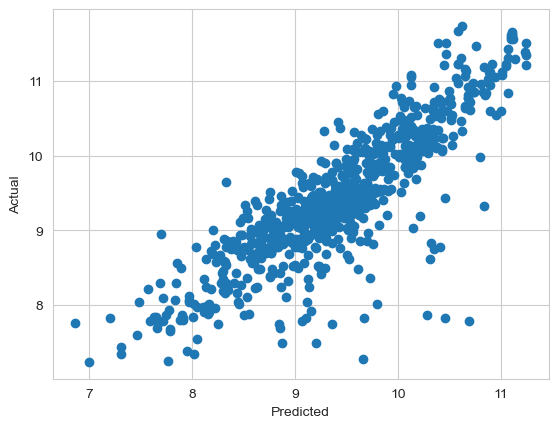

In [155]:
plt.scatter(Y_Pred, Y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [156]:
Y_Pred

array([ 9.43096421, 10.43031252,  9.0862608 ,  8.53738837,  9.6589141 ,
        9.09916738,  8.73590096,  8.74906074, 10.08599498,  8.65569349,
        9.30764233,  9.11501184,  7.5737163 ,  9.03235113,  9.4280126 ,
        9.07204821, 10.56815235,  9.58233523,  9.77936705, 10.5835314 ,
        9.09350955,  7.30921268, 10.34099826, 10.58168155,  9.56314894,
       10.31148302, 10.06438196, 11.00864472,  9.4069006 , 10.17792323,
       10.32677618, 11.04862483,  9.226369  , 10.9573673 ,  8.66440227,
       10.48796536,  8.33947329,  9.82949177,  8.50128325,  8.57108371,
       10.35566485,  9.00036704,  9.52340015, 10.52670007,  8.5312198 ,
        8.67125294, 11.13525991,  8.30573902,  8.79892753, 10.0791152 ,
        9.28933004,  9.1187492 ,  9.67098885,  9.85267961,  8.76381018,
        9.48070759,  9.25354374,  9.58629481,  9.57136633,  8.94624436,
        8.96181085,  9.30619955,  9.67272596, 10.67808949,  9.54257122,
        9.38209758, 10.81034811,  9.10766772,  8.92320935,  8.01

In [157]:
Y_Pred =np.exp(Y_Pred)

In [158]:
Y_Pred

array([12468.54327572, 33870.93400081,  8833.09550469,  5102.00238626,
       15660.76946301,  8947.83948455,  6222.33772531,  6304.76352015,
       24004.46135476,  5742.75010168, 11021.93135267,  9090.74225506,
        1946.36010884,  8369.51427433, 12431.79522547,  8708.44226146,
       38876.77672405, 14506.25523161, 17665.46789473, 39479.28566874,
        8897.35703001,  1494.00047173, 30976.93773073, 39406.32260631,
       14230.58702989, 30076.00700717, 23491.21870332, 60393.98031557,
       12172.0863363 , 26315.7586067 , 30539.49911525, 62857.45569756,
       10161.57771593, 57375.19210991,  5792.98089866, 35881.07807445,
        4185.88440258, 18573.51213503,  4921.07976672,  5276.84528798,
       31434.61171301,  8106.05859078, 13676.03282545, 37298.1896741 ,
        5070.62723257,  5832.80291503, 68545.97134551,  4047.03186631,
        6627.13277189, 23839.88273185, 10821.93146098,  9124.78121416,
       15851.01555113, 19009.22393505,  6398.44439517, 13104.45584387,
      